In [22]:
import h5py
import numpy as np
import os,random
from tensorflow.keras.layers import Input,Reshape,ZeroPadding2D,MaxPool2D,Conv1D,Conv2D,Dropout,Flatten,Dense,Activation,MaxPooling2D,AlphaDropout,BatchNormalization
from tensorflow.keras import layers
import tensorflow.keras.models as Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from ctypes import Array
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.metrics import mean_squared_error, accuracy_score
import cv2

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Define Program Utils**

In [24]:
classes = ['32PSK',
 '16APSK',
 '32QAM',
 'FM',
 'GMSK',
 '32APSK',
 'OQPSK',
 '8ASK',
 'BPSK',
 '8PSK',
 'AM-SSB-SC',
 '4ASK',
 '16PSK',
 '64APSK',
 '128QAM',
 '128APSK',
 'AM-DSB-SC',
 'AM-SSB-WC',
 '64QAM',
 'QPSK',
 '256QAM',
 'AM-DSB-WC',
 'OOK',
 '16QAM']

In [25]:
def select_for_1024(elements_count,snr):
  sample_select_quotient = int(elements_count/1024)
  sample_selected = 1024*(sample_select_quotient)
  print(f"Total Samples of {snr}: {elements_count}, Sampling Quotient: {sample_select_quotient}, Samples Selected: {sample_selected}")
  return sample_selected,sample_select_quotient

#**Define Predict Data and Plot Confusion Matrix Code**

In [29]:
# Plot confusion matrix
import seaborn as sns
def plot_confusion_matrix(cm, title='Confusion matrix', labels=[]):
    plt.figure(figsize=(20, 10))
    sns.heatmap(cm,annot=True,cmap='Blues', cbar_kws={'ticks': np.linspace(0, 0.05, 1)})
    plt.imshow(cm, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels,rotation=360)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def generate_confusion_matrix_plot():
  conf = np.zeros([len(classes),len(classes)])
  confnorm = np.zeros([len(classes),len(classes)])
  for i in range(0,X_test.shape[0]):
    if 1 in list(Y_test[i,:]):
      k = np.argmax(Y_pred[i])
      j = list(Y_test[i,:]).index(1)
      conf[j,k] = conf[j,k] + 1
  for i in range(0,len(classes)):
      confnorm[i,:] = (conf[i,:] )/ (np.sum(conf[i,:]))

  plot_confusion_matrix(confnorm, labels=classes)



#Predict Model
def predict_model():
  model = Model.load_model('/content/drive/My Drive/Radio-Signal-Classification/Submission/Model_Files/model_full_SNR.h5')
  print(model.input)
  print(model.output)
  n_examples = X.shape[0]
  test_idx = list(set(range(0,n_examples))) #Test sample index

  print("X_test:",X_test.shape)
  print("Y_test:",Y_test.shape)
  mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1","/gpu:2"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
  Y_pred = model.predict(X_test, batch_size=1024)
  generate_confusion_matrix_plot()

#**Self Generated Dataset QPSK**

KerasTensor(type_spec=TensorSpec(shape=(None, 1024, 2), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 24), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")
X_test: (10, 1024, 2)
Y_test: (10240, 24)
1/1 [==============================] - 1s 524ms/step


<ipython-input-17-8e21f614296d>:26: RuntimeWarning: invalid value encountered in divide
  confnorm[i,:] = (conf[i,:] )/ (np.sum(conf[i,:]))


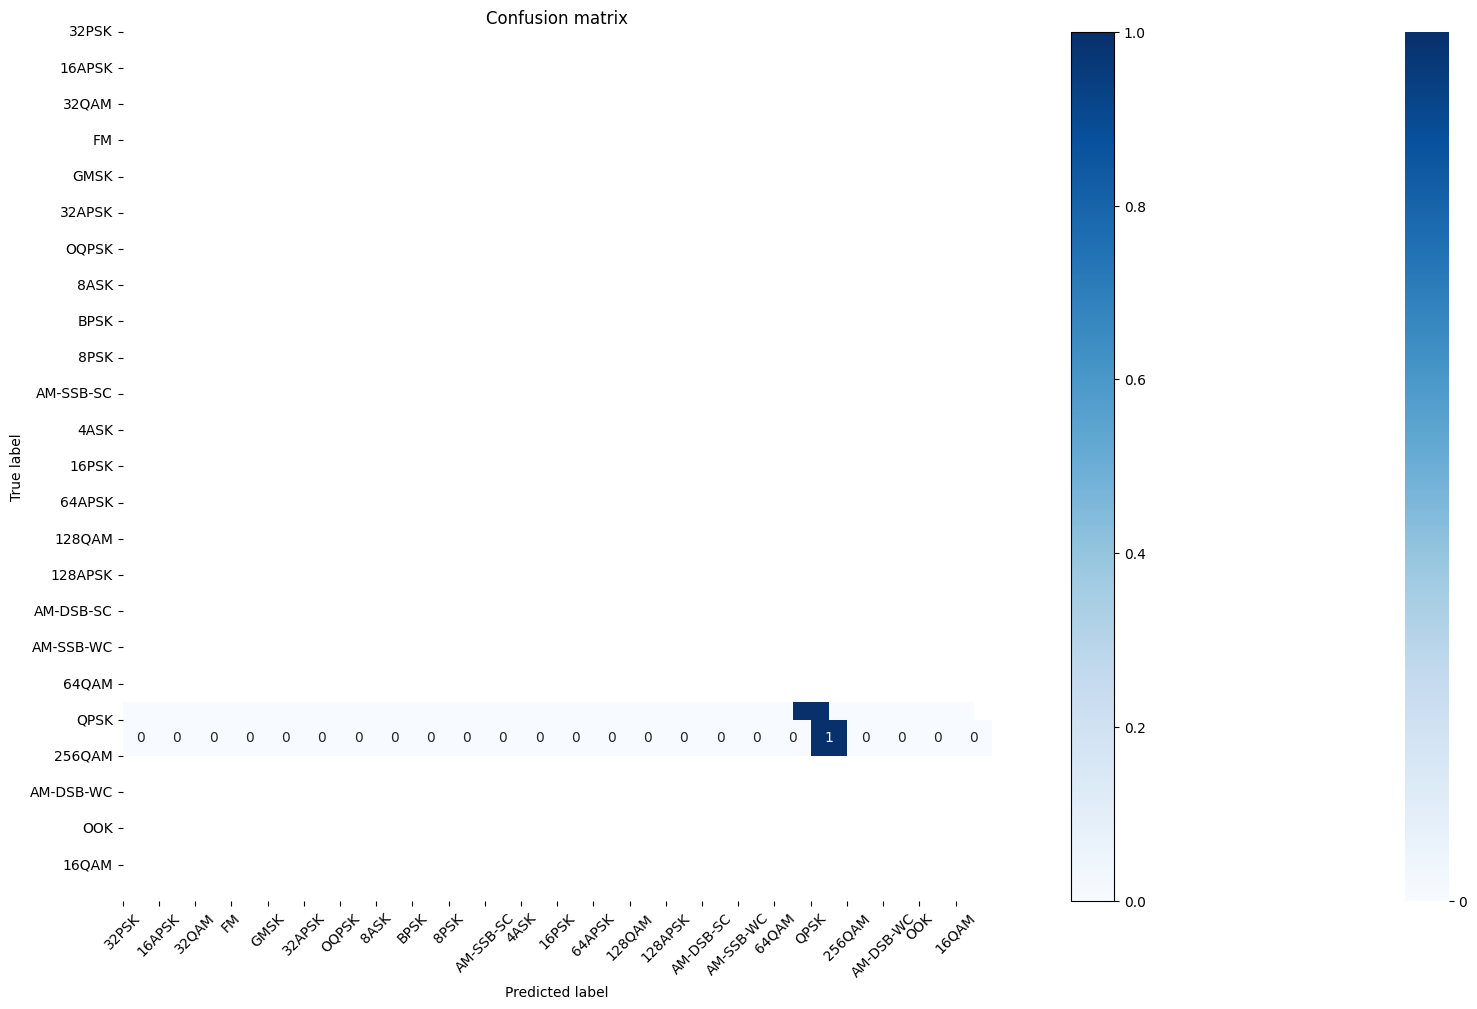

In [ ]:


num_symbols = 10240

# x_symbols array will contain complex numbers representing the QPSK symbols. Each symbol will be a complex number with a
#  magnitude of 1 and a phase angle corresponding to one of the four QPSK constellation points (45, 135, 225, or 315 degrees)
x_int = np.random.randint(0, 3, num_symbols) # 0 to 3
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
r = x_symbols + n * np.sqrt(0.01) # noise power of 0.01
X= np.array([np.real(r),np.imag(r)])
#Reshaped data as per Model expectation (None, 1024, 2)
X= X.reshape(10,1024,2)
Y=np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],(10240,1))
X_test=X
Y_test=Y
Y_pred=Y
predict_model()

#**RML2018.10 Dataset**

/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part0.h5
/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part1.h5
/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part2.h5
/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part3.h5
/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part4.h5
X-size： (187200, 1024, 2)
Y-size： (187200, 24)
Z-size： (187200, 1)
KerasTensor(type_spec=TensorSpec(shape=(None, 1024, 2), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 24), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")
X_test: (187200, 1024, 2)
Y_test: (187200, 24)
183/183 [==============================] - 639s 3s/step


<ipython-input-29-f7a78953f4f0>:26: RuntimeWarning: invalid value encountered in divide
  confnorm[i,:] = (conf[i,:] )/ (np.sum(conf[i,:]))


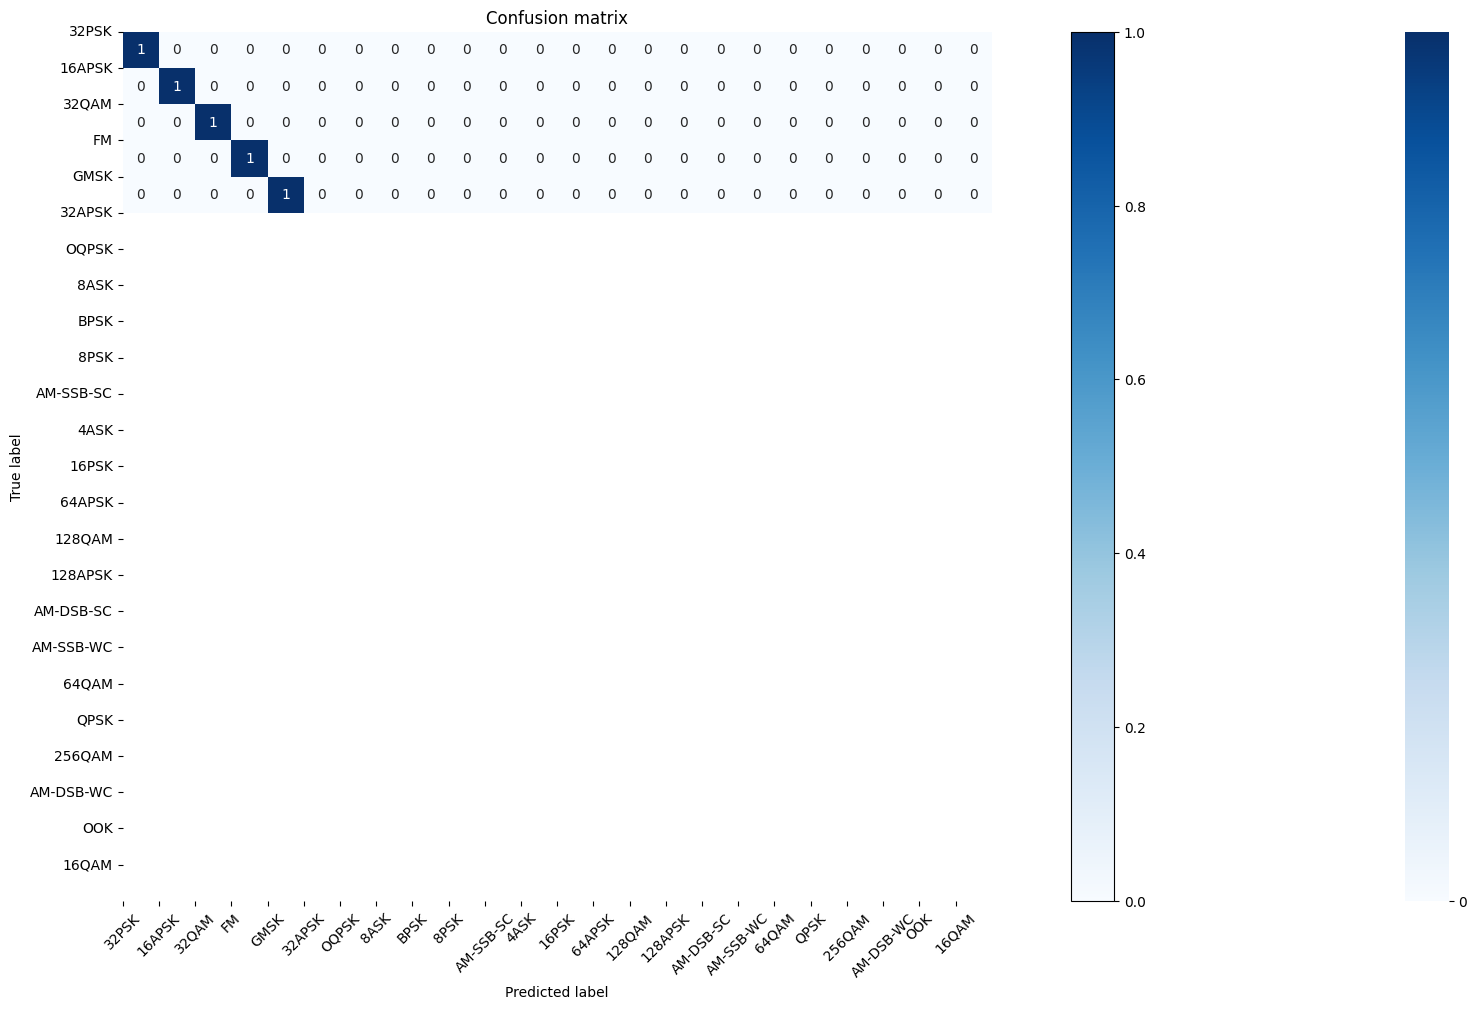

In [31]:
#Load Data
f = h5py.File('/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part0.h5')
sample_num = f['X'].shape[0]
idx = np.arange(sample_num)
#X - Signal, Y- Modulations , Z- SNR
X = f['X'][:][idx]
Y = f['Y'][:][idx]
Z = f['Z'][:][idx]

for i in range(0,5):
    filename = '/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2018.01A.Dataset/part'+str(i) + '.h5'
    print(filename)
    f = h5py.File(filename,'r')
    X = np.vstack((X,f['X'][:][idx]))
    Y = np.vstack((Y,f['Y'][:][idx]))
    Z = np.vstack((Z,f['Z'][:][idx]))
    f.close()
print('X-size：',X.shape)
print('Y-size：',Y.shape)
print('Z-size：',Z.shape)
X_test=X
Y_test=Y
Y_pred=Y
predict_model()

#**RML2016.10A Dataset**

Total Samples of 8PSK: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of AM-DSB: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of AM-SSB: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of BPSK: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of CPFSK: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of GFSK: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of PAM4: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of QAM16: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of QAM64: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of QPSK: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
Total Samples of WBFM: 2560000, Sampling Quotient: 2500, Samples Selected: 2560000
(28160000, 2)
Total Samples of all mods: 28160000, Sampling Quotient: 27500, Sam

275/275 [==============================] - 69s 249ms/step


<ipython-input-17-8e21f614296d>:26: RuntimeWarning: invalid value encountered in divide
  confnorm[i,:] = (conf[i,:] )/ (np.sum(conf[i,:]))


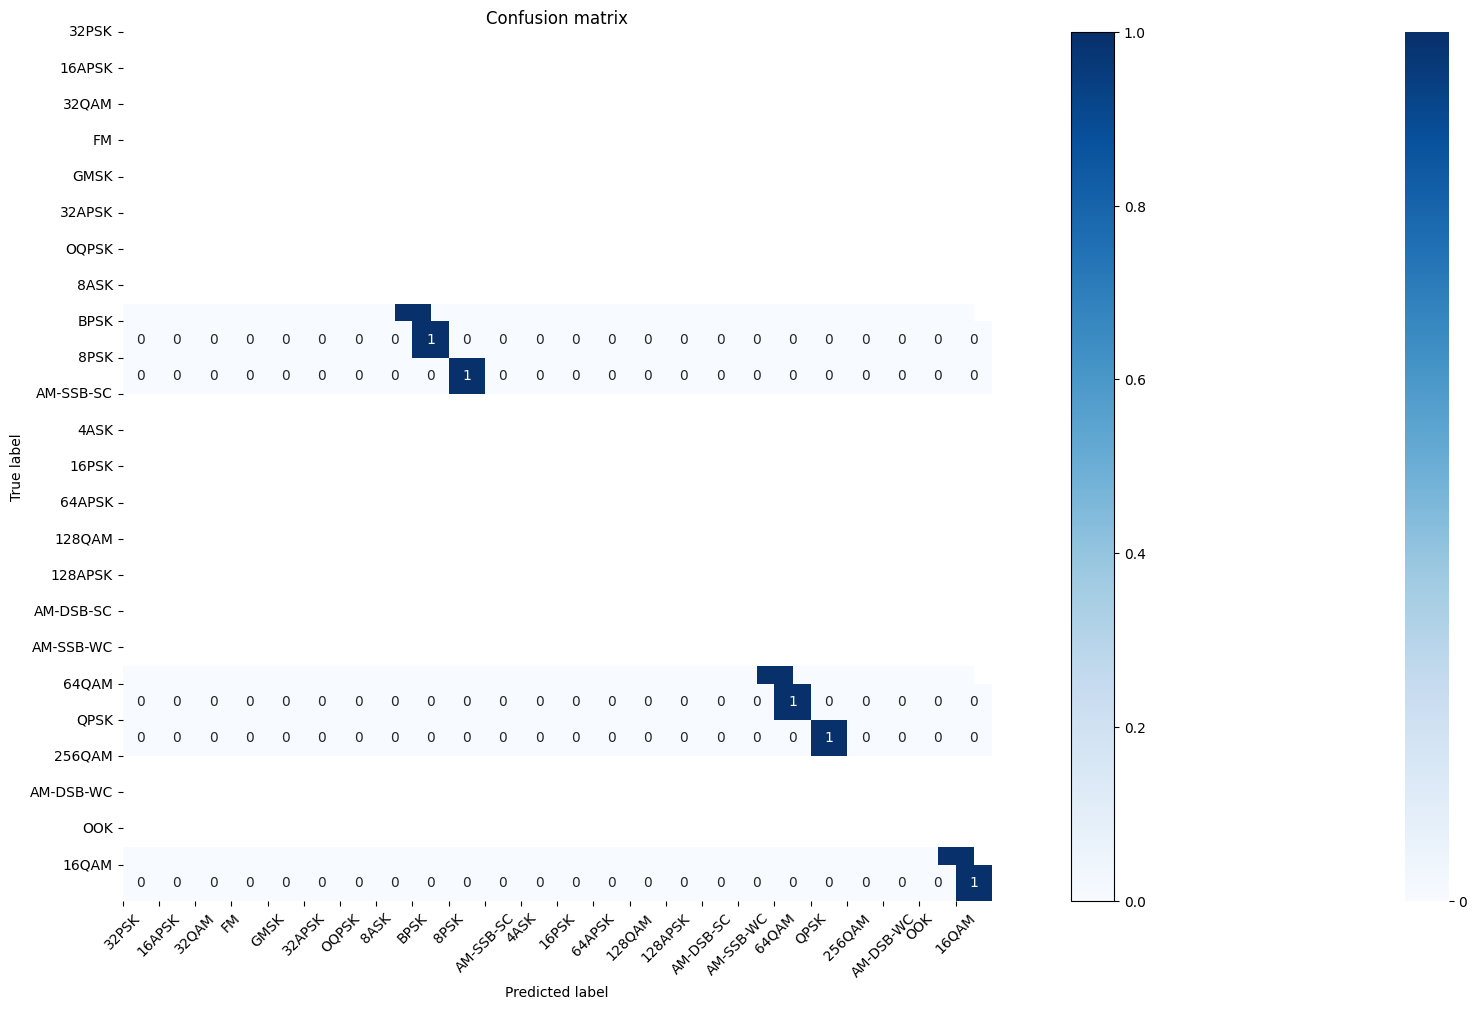

In [ ]:
# Load pkl dataset
Xd = pkl.load(open("/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2016.10A.Dataset/RML2016.10a_dict.pkl",'rb'),encoding ='latin1')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

X = []
Y = []

for mod in mods:
    sample_Y= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    count=0
    element_1024=[]

    for snr in snrs:
        for count in range(len(Xd[(mod,snr)])):
            # single set of 2,128 samples
            element_2_128 = Xd[(mod,snr)][count]
            # transposed set of 128,2 samples
            element_128_2 = np.transpose(element_2_128)
            # show_shaping_proof(element_2_128,element_128_2)
            #Including samples to array
            element_1024.extend(element_128_2)
    #Divide whole {mod} elements to chunks of 1024
    sample_selected,sample_quotient=select_for_1024(len(element_1024),mod)
    X.append(element_1024[0:sample_selected])
    if mod in classes:
      sample_Y[classes.index(mod)]=1
    elif(mod=='QAM16'):
      sample_Y[23]=1
    elif(mod=='QAM64'):
      sample_Y[18]=1
    #Label data in array of 24 elements form
    Y.append([sample_Y]*sample_quotient)

#Array to list
X = np.vstack(X)
print(X.shape)
sample_selected,sample_quotient=select_for_1024(len(X),"all mods")
X=X.reshape(sample_quotient,1024,2)
Y = np.vstack(Y)
print("X_test:",X.shape)
print("Y_test:",Y.shape)
print(Y)
X_test=X
Y_test=Y
Y_pred=Y
predict_model()

In [ ]:
#func dataset

#**RML2016.10C Dataset**

Total Samples of 8PSK: 1057280, Sampling Quotient: 1032, Samples Selected: 1056768
Total Samples of AM-DSB: 1804800, Sampling Quotient: 1762, Samples Selected: 1804288
Total Samples of AM-SSB: 1804800, Sampling Quotient: 1762, Samples Selected: 1804288
Total Samples of BPSK: 3192320, Sampling Quotient: 3117, Samples Selected: 3191808
Total Samples of CPFSK: 3192320, Sampling Quotient: 3117, Samples Selected: 3191808
Total Samples of GFSK: 3192320, Sampling Quotient: 3117, Samples Selected: 3191808
Total Samples of PAM4: 1592320, Sampling Quotient: 1555, Samples Selected: 1592320
Total Samples of QAM16: 793600, Sampling Quotient: 775, Samples Selected: 793600
Total Samples of QAM64: 527360, Sampling Quotient: 515, Samples Selected: 527360
Total Samples of QPSK: 1592320, Sampling Quotient: 1555, Samples Selected: 1592320
Total Samples of WBFM: 1994240, Sampling Quotient: 1947, Samples Selected: 1993728
(20740096, 2)
Total Samples of all mods: 20740096, Sampling Quotient: 20254, Samples S

<ipython-input-29-f7a78953f4f0>:26: RuntimeWarning: invalid value encountered in divide
  confnorm[i,:] = (conf[i,:] )/ (np.sum(conf[i,:]))


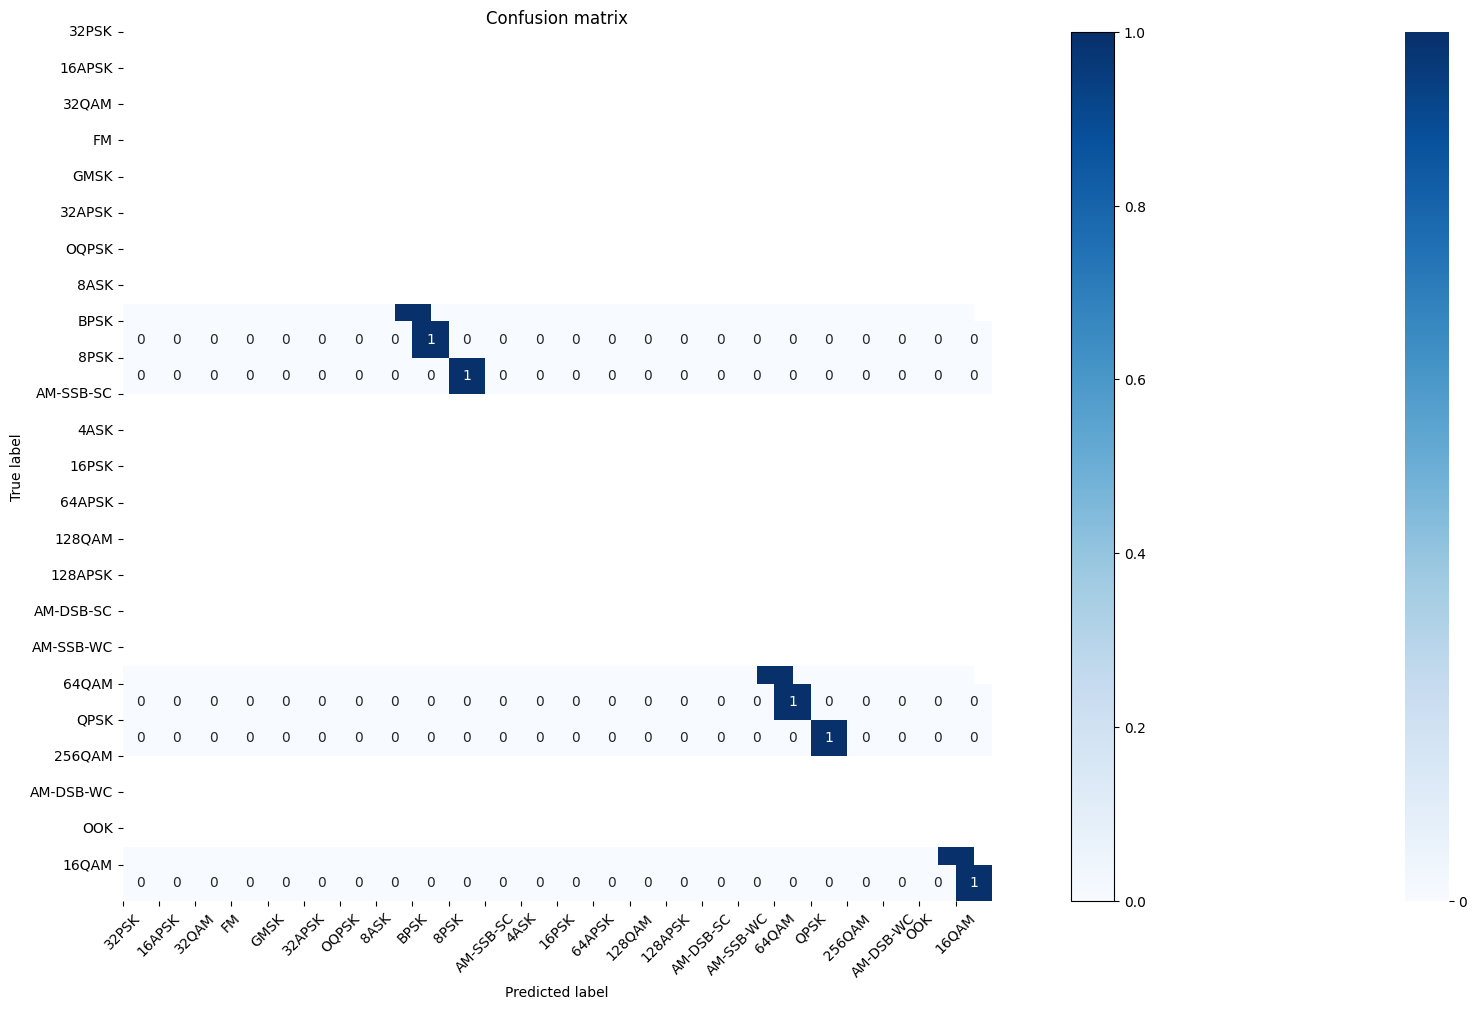

In [33]:
Xd = pkl.load(open("/content/drive/My Drive/Radio-Signal-Classification/Submission/RML2016.10C.Dataset/2016.04C.multisnr.pkl",'rb'),encoding ='latin1')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
# # classes_11=['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
X = []
Y = []

for mod in mods:
      sample_Y= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
      count=0
      element_1024=[]
      for snr in snrs:
        for count in range(len(Xd[(mod,snr)])):
          # single set of 2,128 samples
          element_2_128 = Xd[(mod,snr)][count]
          # transposed set of 128,2 samples
          element_128_2 = np.transpose(element_2_128)
          # show_shaping_proof(element_2_128,element_128_2)
          element_1024.extend(element_128_2)
      sample_selected,sample_quotient=select_for_1024(len(element_1024),mod)
      X.append(element_1024[0:sample_selected])
      if mod in classes:
        sample_Y[classes.index(mod)]=1
      elif(mod=='QAM16'):
        sample_Y[23]=1
      elif(mod=='QAM64'):
        sample_Y[18]=1
      Y.append([sample_Y]*sample_quotient)

X = np.vstack(X)
print(X.shape)
sample_selected,sample_quotient=select_for_1024(len(X),"all mods")
X=X.reshape(sample_quotient,1024,2)
Y = np.vstack(Y)
X_test=X
Y_test=Y
Y_pred=Y
print("X_test:",X.shape)
print("Y_test:",Y.shape)
predict_model()

#Create Dataframe Table and Plot Time Domain IQ

In [ ]:
import pandas as pd

X_df = X.reshape(-1, 2048)  # Combine the last two dimensions of X
indices = np.where(Y == 1)
Y_result = np.take(classes, indices[1])

# Create a DataFrame to tabulate the data
data = {'I': X_df[indices[0]][:, 0],  # Assuming X has 2 dimensions
        'Q': X_df[indices[0]][:, 1],  # Assuming X has 2 dimensions
        'Modulation': Y_result,
        'SNR': np.concatenate(Z)}
df = pd.DataFrame(data)


# Display the tabulated data
print(df)



               I         Q Modulation  SNR
0       0.549050 -0.035508      32PSK  -20
1      -0.354052 -1.039049      32PSK  -20
2      -0.206260 -0.800696      32PSK  -20
3      -0.393526 -0.903932      32PSK  -20
4       0.555695 -0.969768      32PSK  -20
...          ...       ...        ...  ...
155995  0.288747 -0.421498      16QAM   30
155996  0.587227  0.080577      16QAM   30
155997  0.803734 -1.062842      16QAM   30
155998  1.164594  0.171522      16QAM   30
155999  0.575668 -0.648014      16QAM   30

[156000 rows x 4 columns]


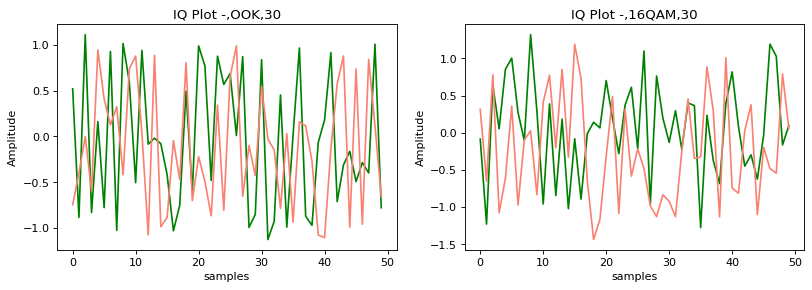

In [ ]:
from scipy.signal import spectrogram
fig = plt.figure(figsize=(20, 20), dpi=80)
SNR=30

# ADD SNR,SHOW NOISY
for clas in classes[22:24]:
    row=df[(df['Modulation'] == clas) & (df['SNR'] == SNR)]
    plt.subplot(6, 4, classes.index(clas)+1)
    plt.plot(range(0,50),row['I'][0:50],color='green', label='I component')
    plt.plot(range(0,50),row['Q'][0:50],color='salmon', label='Q component')
    # plt.xticks(range(0,50))
    plt.title(f'IQ Plot -,{clas},{SNR}')
    plt.xlabel('samples')
    plt.ylabel('Amplitude')
plt.tight_layout(pad=1.7)

